<a href="https://colab.research.google.com/github/seimwiwa/playground_python/blob/main/20231216_podcast_speaker_diarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Install
%%capture
!pip install pyannote.audio umap-learn datashader hdbscan

In [166]:
#@title Import
%%capture

import os
from google.colab import drive
from pydub import AudioSegment
from pyannote.audio import Model, Inference
import pandas as pd
import umap, umap.plot
import numpy as np
from hdbscan import HDBSCAN

In [ ]:
#@title Conntect Google Drive
drive.mount("/content/drive")

In [6]:
#@title List Aplited Audio
path = "/content/drive/MyDrive/(07) Colab/20231216_podcast_analysis/splited_audio/"
files = os.listdir(path)

In [ ]:
#@title Get Embedding Models
%%capture
model = Model.from_pretrained("pyannote/embedding", use_auth_token="")
inference = Inference(model, window = "whole")

In [ ]:
#@title Get Embedding
embeddings = []
for i in files:
  try:
    embeddings.append({"id": i, "embedding": inference(path+i)})
  except:
    print(i)

In [127]:
#@title Get None Empty Embedding's id
nono_empty_ids = []
for i in range(len(embeddings)):
  if np.isnan(embeddings[i]["embedding"]).any() == False:
    nono_empty_ids.append(i)

In [131]:
#@title Get None Empty Embedding
ids = [embeddings[i]["id"] for i in nono_empty_ids]
embeddings = [embeddings[i]["embedding"] for i in nono_empty_ids]

In [177]:
#@title Detect Speakers
umap_reducer = umap.UMAP(n_neighbors=10, min_dist=0.1, n_components=2, metric="euclidean")
reduced_embeddings = umap_reducer.fit(embeddings)
hdbscan = HDBSCAN(min_cluster_size=10, gen_min_span_tree=True)
labels = hdbscan.fit(reduced_embeddings.embedding_).labels_

<Axes: >

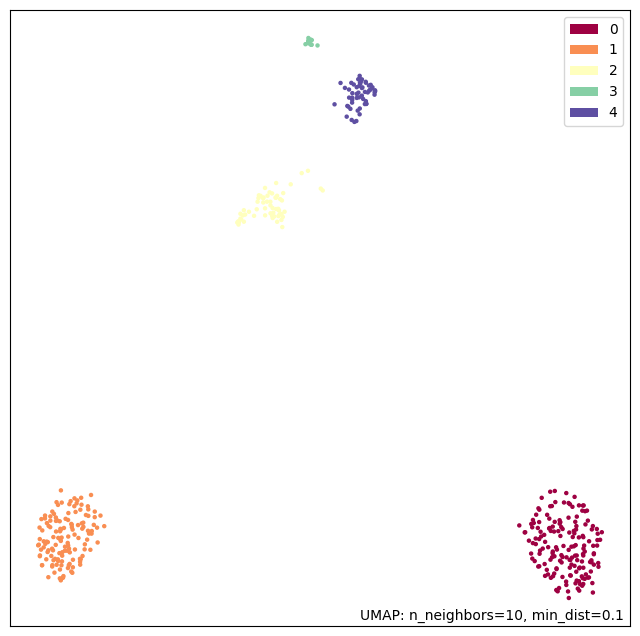

In [178]:
#@title Plot Speaker and Audio
umap.plot.points(reduced_embeddings, labels=labels)

In [181]:
data = pd.DataFrame({"id": ids, "speaker": labels})
data["id"] = data.id.str.replace(".mp3", "").astype(int)
data = data.sort_values(["id"]).filter(["id", "speaker"]).reset_index(drop = True)

In [183]:
#@title Save The Scripts
data.to_csv("/content/drive/MyDrive/(07) Colab/20231216_podcast_analysis/speakers.csv", index=False)